In [29]:
import pandas as pd
data = pd.read_excel("WorldBank.xlsx")
# print(data.info())
print(data.isnull().sum())

Country Name                                                       0
Country Code                                                       0
Region                                                             0
IncomeGroup                                                        0
Year                                                               0
Birth rate, crude (per 1,000 people)                            1009
Death rate, crude (per 1,000 people)                            1033
Electric power consumption (kWh per capita)                     6601
GDP (USD)                                                       2871
GDP per capita (USD)                                            2874
Individuals using the Internet (% of population)                7385
Infant mortality rate (per 1,000 live births)                   2465
Life expectancy at birth (years)                                1273
Population density (people per sq. km of land area)              604
Unemployment (% of total labor for

In [30]:
# Columns to drop (not needed for your 5 objectives)
columns_to_drop = [
    "Electric power consumption (kWh per capita)",
    "Infant mortality rate (per 1,000 live births)",
    "Population density (people per sq. km of land area)",
    "Unemployment (% of total labor force) (modeled ILO estimate)"
]

data.drop(columns=columns_to_drop, inplace=True)

In [31]:
# Columns you want to fill
columns_to_fill = [
    "GDP (USD)",
    "GDP per capita (USD)",
    "Life expectancy at birth (years)",
    "Birth rate, crude (per 1,000 people)",
    "Death rate, crude (per 1,000 people)",
    "Individuals using the Internet (% of population)"
]

# Interpolate missing values for each country across years
# Interpolate missing values (FIXED version)
for col in columns_to_fill:
    data[col] = (
        data.sort_values(by=["Country Name", "Year"])
            .groupby("Country Name")[col]
            .ffill()
            .bfill()
    )
data.to_csv("WorldBank_Cleaned.csv", index=False)

In [32]:
data2 = pd.read_csv("WorldBank_Cleaned.csv")
print(data2.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country Name                                      12449 non-null  object 
 1   Country Code                                      12449 non-null  object 
 2   Region                                            12449 non-null  object 
 3   IncomeGroup                                       12449 non-null  object 
 4   Year                                              12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)              12449 non-null  float64
 6   Death rate, crude (per 1,000 people)              12449 non-null  float64
 7   GDP (USD)                                         12449 non-null  float64
 8   GDP per capita (USD)                              12449 non-null  float64
 9   Individuals using

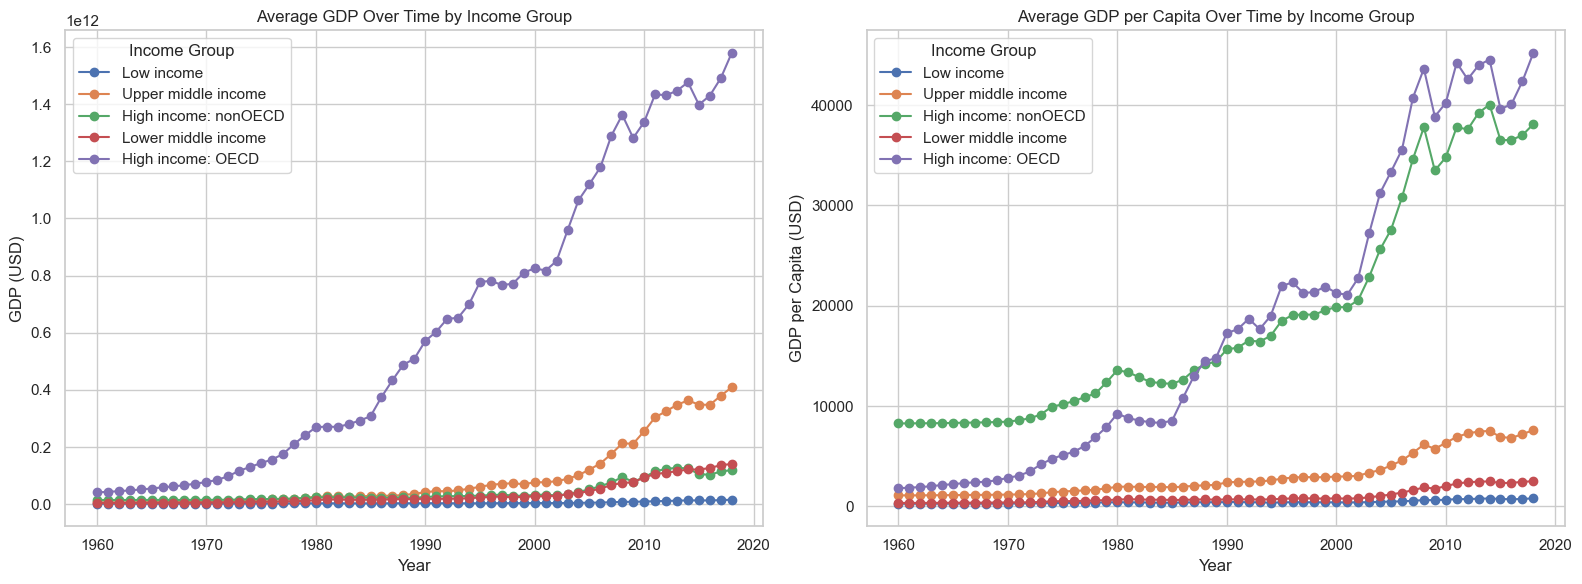

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("WorldBank_Cleaned.csv")

# Remove rows with missing values in important columns
df = df.dropna(subset=['GDP (USD)', 'GDP per capita (USD)', 'IncomeGroup'])

import matplotlib.pyplot as plt

# Create 2 subplots: side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# 1. GDP over time by Income Group
for group in df['IncomeGroup'].unique():
    group_data = df[df['IncomeGroup'] == group]
    yearly_avg = group_data.groupby('Year')['GDP (USD)'].mean()
    axes[0].plot(yearly_avg.index, yearly_avg.values, marker='o', label=group)

axes[0].set_title('Average GDP Over Time by Income Group')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP (USD)')
axes[0].grid(True)
axes[0].legend(title='Income Group')

# 2. GDP per capita over time by Income Group
for group in df['IncomeGroup'].unique():
    group_data = df[df['IncomeGroup'] == group]
    yearly_avg = group_data.groupby('Year')['GDP per capita (USD)'].mean()
    axes[1].plot(yearly_avg.index, yearly_avg.values, marker='o', label=group)

axes[1].set_title('Average GDP per Capita Over Time by Income Group')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP per Capita (USD)')
axes[1].grid(True)
axes[1].legend(title='Income Group')

# Adjust layout
plt.tight_layout()
plt.show()



High income countries consistently show the highest GDP and GDP per capita values over the years.

Upper middle income countries have moderate GDP values, showing steady growth.

Low income countries have the lowest GDP and GDP per capita, with slow or flat growth.

The gap between income groups has remained wide over time, showing clear economic inequality.

Overall, all groups show a slight upward trend, indicating gradual global economic growth.

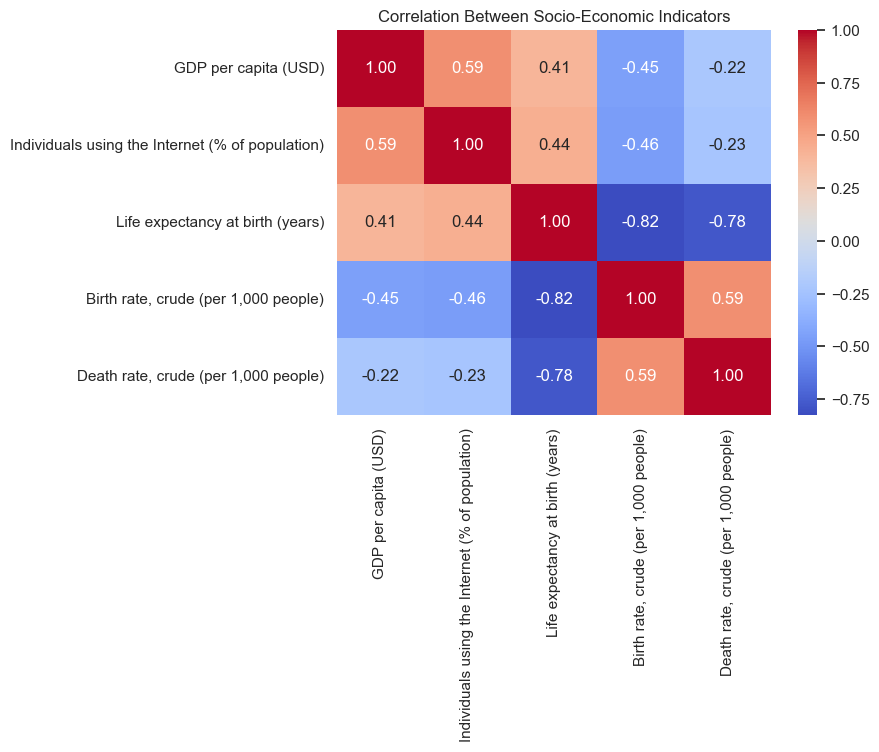

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
cols = ['GDP per capita (USD)', 
        'Individuals using the Internet (% of population)', 
        'Life expectancy at birth (years)', 
        'Birth rate, crude (per 1,000 people)', 
        'Death rate, crude (per 1,000 people)']

df_selected = df[cols].dropna()

# Calculate correlation matrix
correlation = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Socio-Economic Indicators")
plt.show()


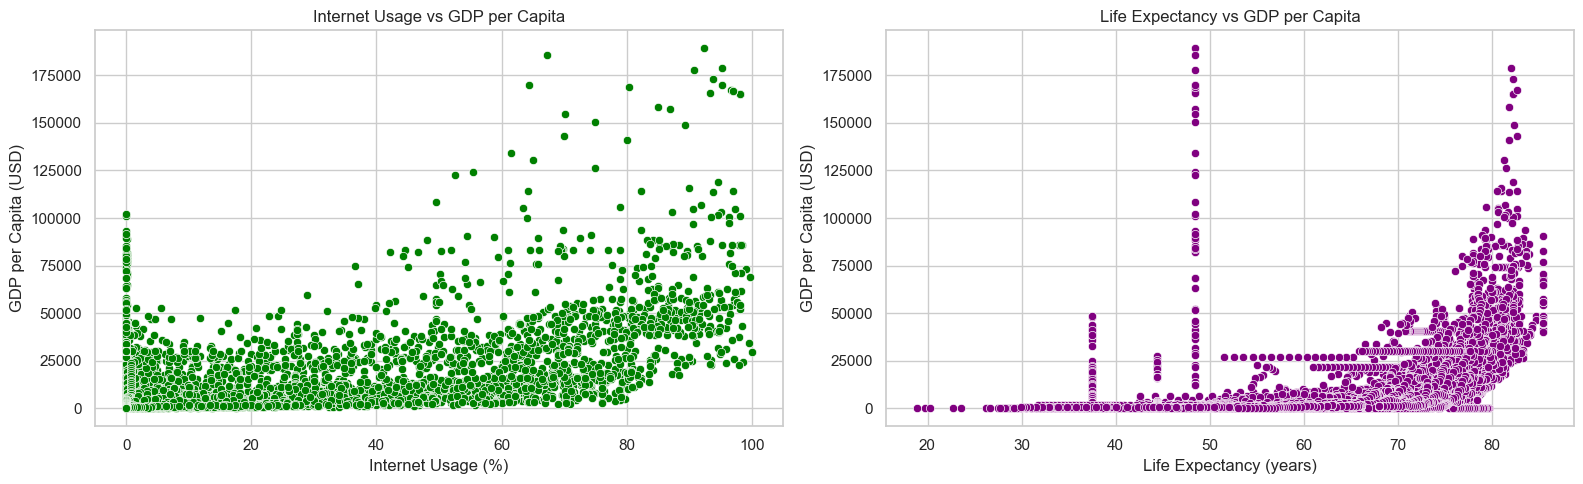

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Scatter Plot 1: Internet Usage vs GDP
sns.scatterplot(data=df_selected, 
                x='Individuals using the Internet (% of population)', 
                y='GDP per capita (USD)', 
                color='green', ax=axes[0])
axes[0].set_title("Internet Usage vs GDP per Capita")
axes[0].set_xlabel("Internet Usage (%)")
axes[0].set_ylabel("GDP per Capita (USD)")
axes[0].grid(True)

# Scatter Plot 2: Life Expectancy vs GDP
sns.scatterplot(data=df_selected, 
                x='Life expectancy at birth (years)', 
                y='GDP per capita (USD)', 
                color='purple', ax=axes[1])
axes[1].set_title("Life Expectancy vs GDP per Capita")
axes[1].set_xlabel("Life Expectancy (years)")
axes[1].set_ylabel("GDP per Capita (USD)")
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Objective 2: Correlation Analysis Conclusion
Countries with higher life expectancy tend to have lower birth and death rates, showing a strong negative correlation.

GDP per capita is positively correlated with both internet usage and life expectancy, indicating better socio-economic conditions.

Internet usage is negatively correlated with birth rate, suggesting that digital awareness may lead to lower population growth.

Overall, the heatmap highlights meaningful socio-economic relationships that vary across development levels.

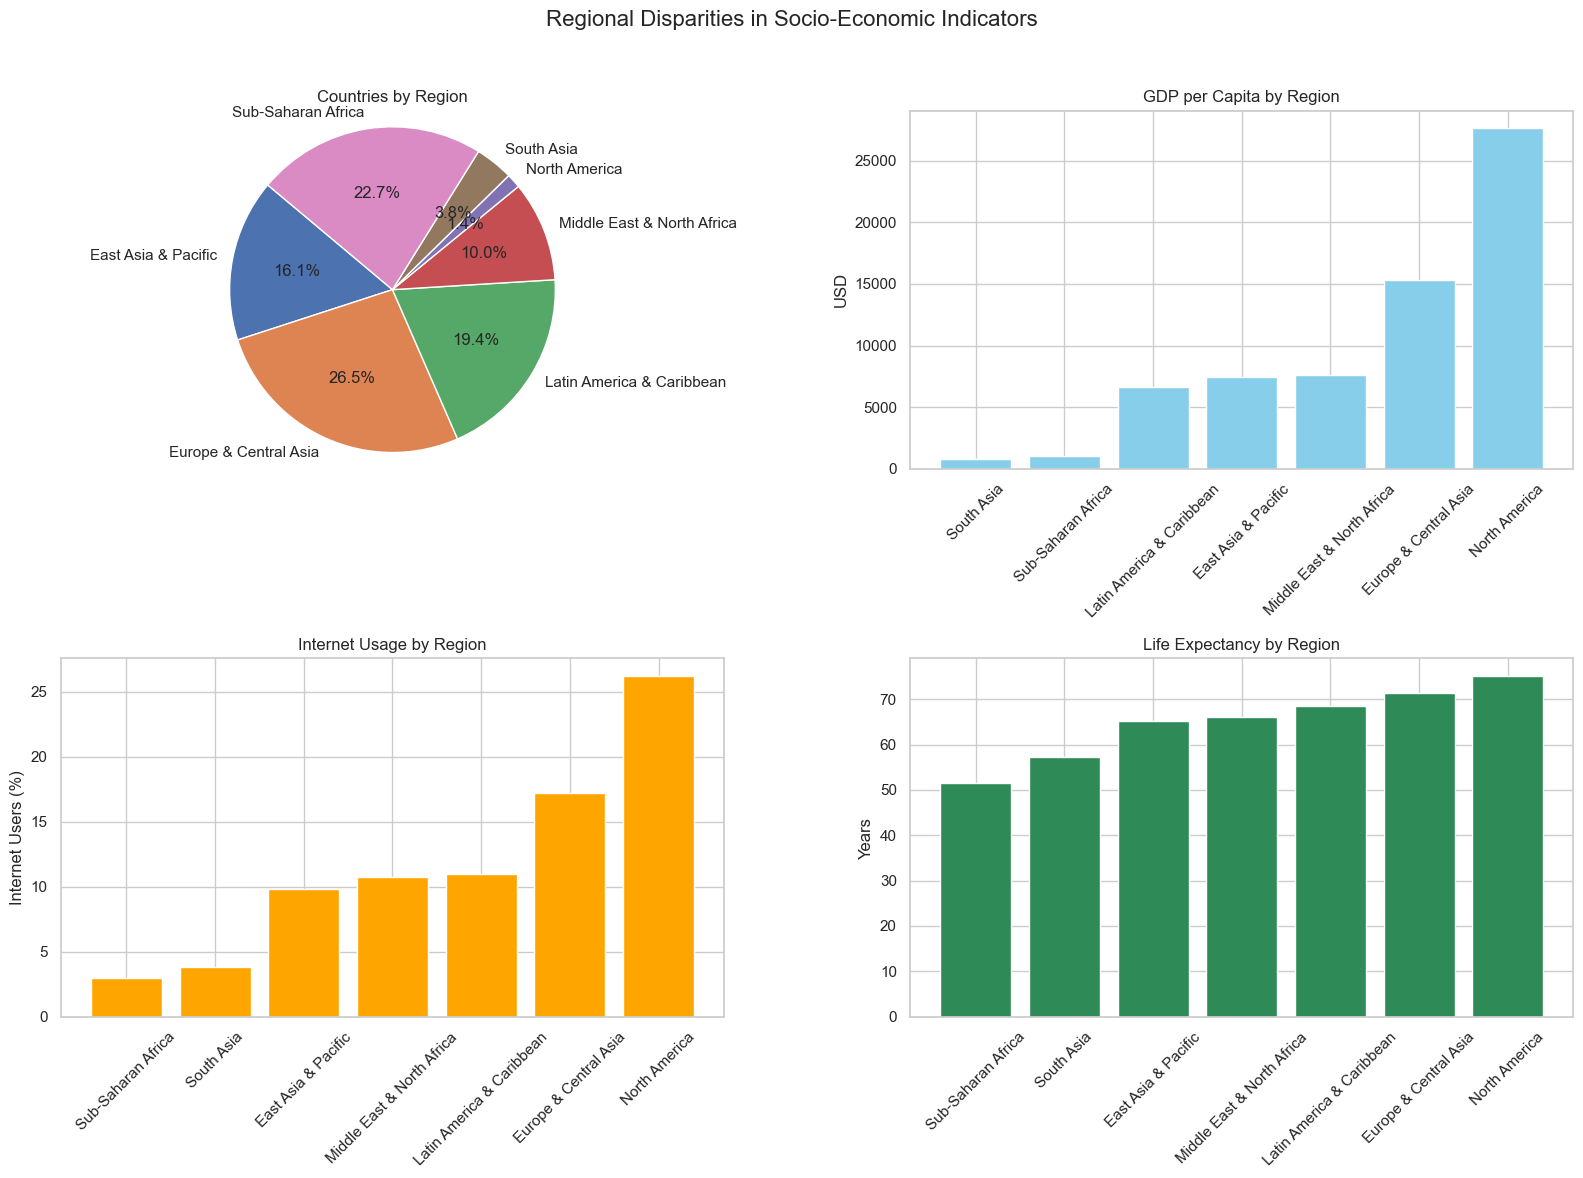

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Regional Disparities in Socio-Economic Indicators", fontsize=16)

# Pie Chart - Country count per Region
region_counts = df.groupby("Region")["Country Name"].nunique()
axs[0, 0].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title("Countries by Region")
axs[0, 0].axis('equal')

# Bar Chart - GDP per Capita by Region
region_gdp = df.groupby("Region")["GDP per capita (USD)"].mean().sort_values()
axs[0, 1].bar(region_gdp.index, region_gdp.values, color='skyblue')
axs[0, 1].set_title("GDP per Capita by Region")
axs[0, 1].set_ylabel("USD")
axs[0, 1].tick_params(axis='x', rotation=45)

# Bar Chart - Internet Usage by Region
region_net = df.groupby("Region")["Individuals using the Internet (% of population)"].mean().sort_values()
axs[1, 0].bar(region_net.index, region_net.values, color='orange')
axs[1, 0].set_title("Internet Usage by Region")
axs[1, 0].set_ylabel("Internet Users (%)")
axs[1, 0].tick_params(axis='x', rotation=45)

# Bar Chart - Life Expectancy by Region
region_life = df.groupby("Region")["Life expectancy at birth (years)"].mean().sort_values()
axs[1, 1].bar(region_life.index, region_life.values, color='seagreen')
axs[1, 1].set_title("Life Expectancy by Region")
axs[1, 1].set_ylabel("Years")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Conclusion (Objective 3): Regional & Income Group Disparities
The analysis highlights clear regional disparities in key socio-economic indicators.

GDP per capita is highest in regions like North America and Europe, while Sub-Saharan Africa lags far behind.

Internet usage is heavily concentrated in high-income regions, indicating a strong digital divide.

Life expectancy also varies, with developed regions showing higher longevity compared to low-income areas.

The pie chart reveals that regions like Sub-Saharan Africa have the highest number of countries but often lower averages in development metrics.

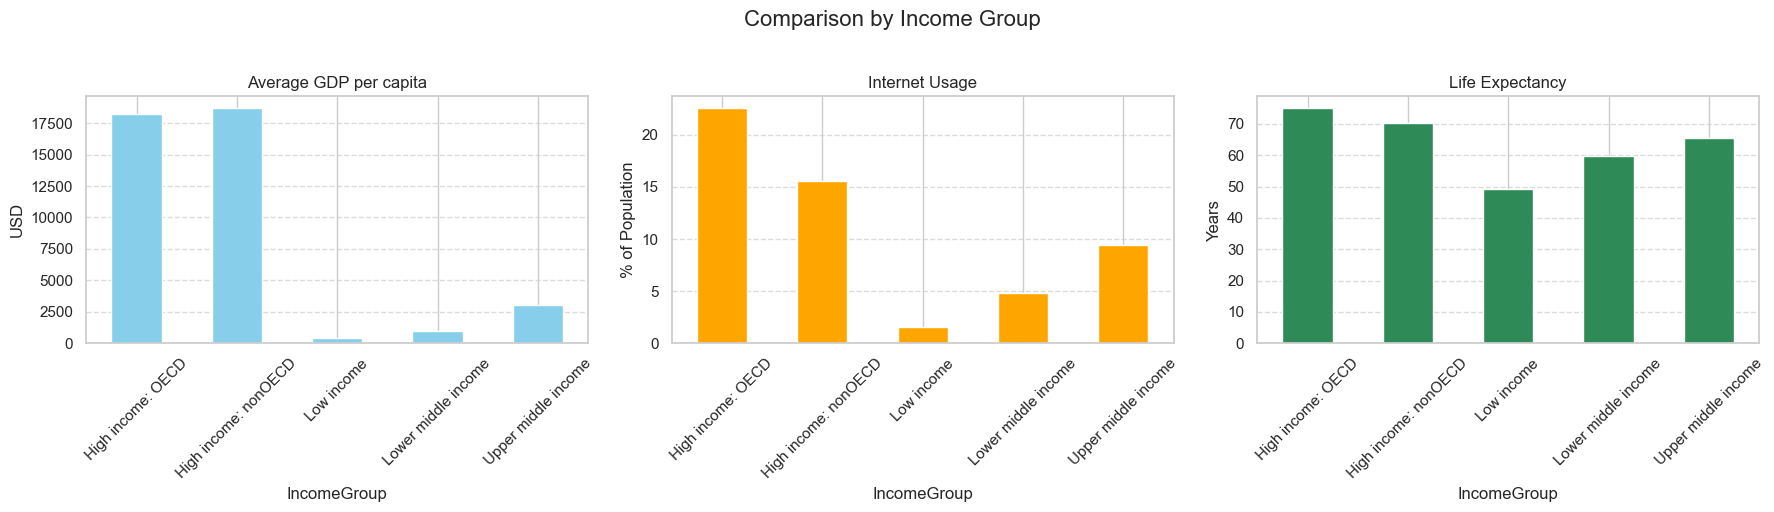

In [38]:
cols = ['IncomeGroup', 'GDP per capita (USD)',
        'Individuals using the Internet (% of population)',
        'Life expectancy at birth (years)']

df_selected = df[cols].dropna()

# Group by Income Group and take mean
import matplotlib.pyplot as plt

# Create figure with 3 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

grouped = df_selected.groupby('IncomeGroup').mean()

# 1. GDP per Capita
grouped['GDP per capita (USD)'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average GDP per capita')
axes[0].set_ylabel('USD')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Internet Usage
grouped['Individuals using the Internet (% of population)'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Internet Usage')
axes[1].set_ylabel('% of Population')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Life Expectancy
grouped['Life expectancy at birth (years)'].plot(kind='bar', ax=axes[2], color='seagreen')
axes[2].set_title('Life Expectancy')
axes[2].set_ylabel('Years')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.suptitle('Comparison by Income Group', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Conclusion (Objective 4):
GDP per capita: Clearly highest in High-Income countries and lowest in Low-Income groups.

Internet usage: High-Income countries have widespread internet access, while Low-Income countries have limited access.

Life Expectancy: Strongly correlated with income — higher income groups enjoy longer life expectancy.



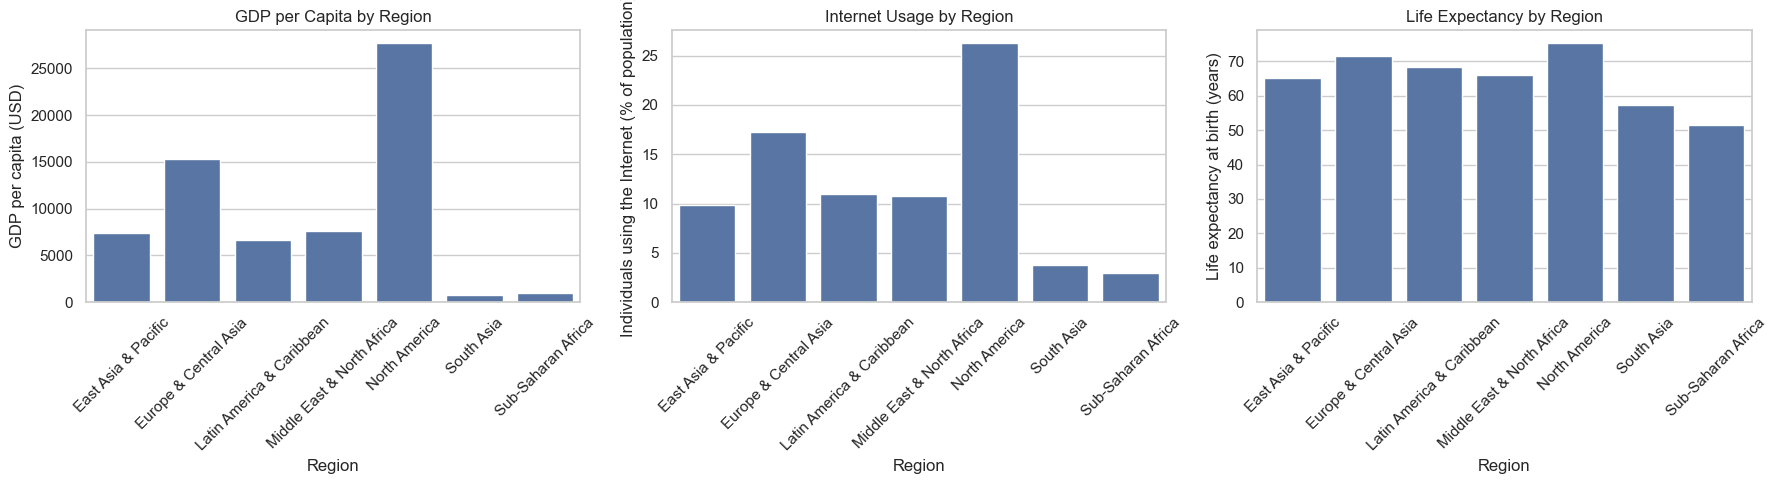

In [39]:
cols = ['Region', 'GDP per capita (USD)', 
        'Individuals using the Internet (% of population)', 
        'Life expectancy at birth (years)']
df_region = df[cols].dropna()

region_mean = df_region.groupby('Region').mean().reset_index()
# print(region_mean)
import matplotlib.pyplot as plt
import seaborn as sns

# Set the canvas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# GDP per Capita by Region
sns.barplot(x='Region', y='GDP per capita (USD)', data=region_mean, ax=axes[0])
axes[0].set_title("GDP per Capita by Region")
axes[0].tick_params(axis='x', rotation=45)

# Internet Usage by Region
sns.barplot(x='Region', y='Individuals using the Internet (% of population)', data=region_mean, ax=axes[1])
axes[1].set_title("Internet Usage by Region")
axes[1].tick_params(axis='x', rotation=45)

# Life Expectancy by Region
sns.barplot(x='Region', y='Life expectancy at birth (years)', data=region_mean, ax=axes[2])
axes[2].set_title("Life Expectancy by Region")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


Conclusion 

Developed regions like Europe and North America have significantly higher GDP per capita, better internet access, and longer life expectancy.
In contrast, regions like Sub-Saharan Africa show low values in all three indicators, highlighting disparities in development across the globe.